In [47]:
! pip install sqlite3
! pip install pandas


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [49]:
! pip install mysql-connector-python


# CONNECTING WITH DATABASE

In [51]:
import mysql.connector

# Establish a connection to the MySQL database
conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",  # MySQL server address
    user="root",       # MySQL username
    password="Bhavesh@2805", # MySQL password
    database="BloodDonationDB" # Name of the database to connect to
)


# 1. LEFT JOIN (or LEFT OUTER JOIN)
This type of join returns all records from the left table (first table) and the matched records from the right table (second table). If there’s no match, the result is NULL on the right side.

In [53]:
import mysql.connector


conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",  
    user="root",       # MySQL username
    password="Bhavesh@2805", # MySQL password
    database="BloodDonationDB" 
)

# Create a cursor 
cursor = conn.cursor()

# LEFT JOIN between DONOR and DONATION_HISTORY
query = '''
SELECT DONOR.Name, DONATION_HISTORY.Donation_Date
FROM DONOR
LEFT JOIN DONATION_HISTORY ON DONOR.Donor_ID = DONATION_HISTORY.Donor_ID;
'''


cursor.execute(query)


donors = cursor.fetchall()
for donor in donors:
    print(donor)


conn.close()


('John Doe', datetime.date(2024, 1, 10))
('Jane Smith', datetime.date(2024, 1, 12))
('Robert Brown', datetime.date(2024, 1, 14))
('Emily Davis', datetime.date(2024, 1, 16))
('Michael Wilson', datetime.date(2024, 1, 18))
('Jessica Johnson', datetime.date(2024, 1, 20))
('David Lee', datetime.date(2024, 1, 22))
('Sarah Martinez', datetime.date(2024, 1, 24))
('William Garcia', datetime.date(2024, 1, 26))
('Linda Rodriguez', datetime.date(2024, 1, 28))
('Daniel Hernandez', datetime.date(2024, 1, 30))
('Laura King', datetime.date(2024, 2, 1))
('Christopher Wright', datetime.date(2024, 2, 3))
('Patricia Scott', datetime.date(2024, 2, 5))
('James Green', datetime.date(2024, 2, 7))


# 2. Count of Blood Types in Inventory

In [55]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",  # MySQL server address
    user="root",       # MySQL username
    password="Bhavesh@2805", # MySQL password
    database="BloodDonationDB" # Name of the database
)

# Create a cursor 
cursor = conn.cursor()
query = '''
    SELECT Blood_Type, COUNT(*) as Total
    FROM BLOOD
    WHERE Status = 'Available'
    GROUP BY Blood_Type;
'''

blood_inventory = pd.read_sql_query(query, conn)
print("\nBlood Types in Inventory:")
print(blood_inventory)



Blood Types in Inventory:
  Blood_Type  Total
0         A+      2
1         A-      2
2         B+      2
3         B-      2
4        AB+      2
5        AB-      2
6         O+      2
7         O-      1


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/3420905317.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blood_inventory = pd.read_sql_query(query, conn)


# 3. ELIGILBE DONORS

In [57]:
import mysql.connector

# Establish a connection to the MySQL database
conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",  # MySQL server address
    user="root",       # MySQL username
    password="Bhavesh@2805", # MySQL password
    database="BloodDonationDB" # Name of the database
)
query = '''
    SELECT Donor_ID, Name, Contact_Info
    FROM DONOR
    WHERE Eligibility_Status = 'Eligible';
'''

eligible_donors = pd.read_sql_query(query, conn)
print("Eligible Donors:")
print(eligible_donors)


Eligible Donors:
    Donor_ID              Name          Contact_Info
0          1          John Doe      john@example.com
1          2        Jane Smith      jane@example.com
2          4       Emily Davis     emily@example.com
3          5    Michael Wilson   michael@example.com
4          6   Jessica Johnson   jessica@example.com
5          7         David Lee     david@example.com
6          9    William Garcia   william@example.com
7         10   Linda Rodriguez     linda@example.com
8         11  Daniel Hernandez    daniel@example.com
9         12        Laura King     laura@example.com
10        14    Patricia Scott  patricia@example.com
11        15       James Green     james@example.com


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/2094581128.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eligible_donors = pd.read_sql_query(query, conn)


# 4. Most Requested Blood Type by Hospitals

In [59]:
import mysql.connector

# Establish a connection to the MySQL database
conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",  # MySQL server address
    user="root",       # MySQL username
    password="Bhavesh@2805", # MySQL password
    database="BloodDonationDB" # Name of the database
)

query = '''
    SELECT hbr.Blood_Type_Requested, SUM(hbr.Quantity_Requested) AS Total_Quantity_Requested
    FROM HOSPITAL_BLOOD_REQUESTS hbr
    GROUP BY hbr.Blood_Type_Requested
    ORDER BY Total_Quantity_Requested DESC
    LIMIT 1;
'''

most_requested_blood = pd.read_sql_query(query, conn)
print("Most Requested Blood Type by Hospitals:")
print(most_requested_blood)


Most Requested Blood Type by Hospitals:
  Blood_Type_Requested  Total_Quantity_Requested
0                   O+                      11.0


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/548348.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_requested_blood = pd.read_sql_query(query, conn)


# Graphs (Bar chart, Pie Chart, Line Plot)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

# Enable inline plotting for Jupyter
%matplotlib inline


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/450846140.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blood_counts = pd.read_sql_query(query, conn)
/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/450846140.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=blood_counts, x='Blood_Type', y='Total', palette='viridis')


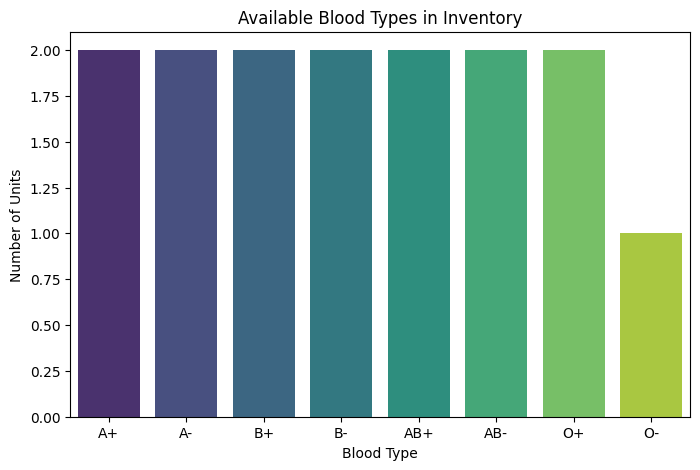

In [63]:
query = '''
    SELECT Blood_Type, COUNT(*) AS Total
    FROM BLOOD
    WHERE Status = 'Available'
    GROUP BY Blood_Type;
'''

blood_counts = pd.read_sql_query(query, conn)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=blood_counts, x='Blood_Type', y='Total', palette='viridis')
plt.title('Available Blood Types in Inventory')
plt.xlabel('Blood Type')
plt.ylabel('Number of Units')
plt.show()


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/3639876854.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  donor_dates = pd.read_sql_query(query, conn)


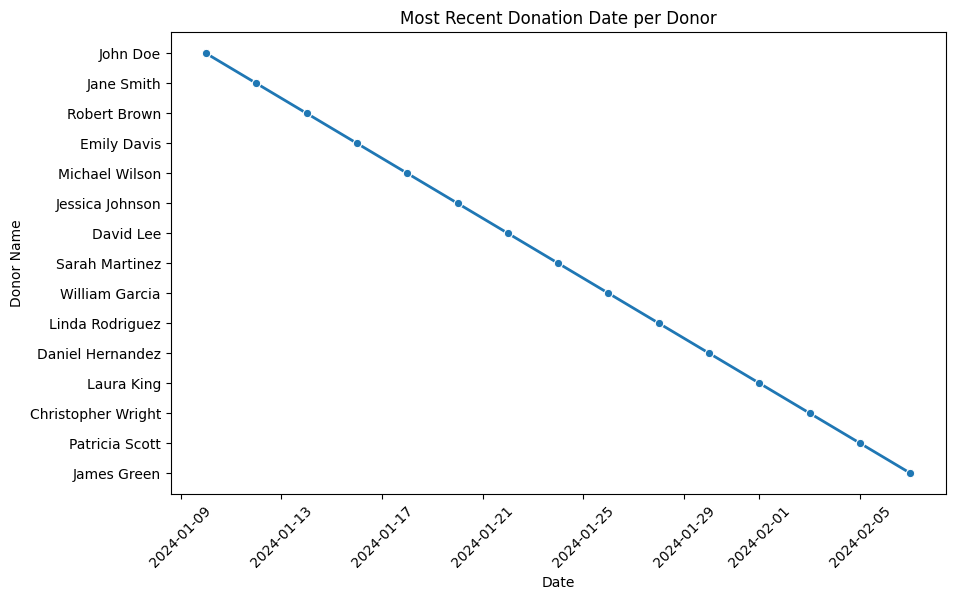

In [65]:
# Run SQL query to get each donor's most recent donation date
query = '''
    SELECT d.Name, MAX(dh.Donation_Date) AS Last_Donation_Date
    FROM DONOR d
    JOIN DONATION_HISTORY dh ON d.Donor_ID = dh.Donor_ID
    GROUP BY d.Donor_ID;
'''

donor_dates = pd.read_sql_query(query, conn)
donor_dates['Last_Donation_Date'] = pd.to_datetime(donor_dates['Last_Donation_Date'])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=donor_dates, x='Last_Donation_Date', y='Name', marker='o', linewidth=2)
plt.title('Most Recent Donation Date per Donor')
plt.xlabel('Date')
plt.ylabel('Donor Name')
plt.xticks(rotation=45)
plt.show()


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/1012790954.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  delivery_status = pd.read_sql_query(query, conn)


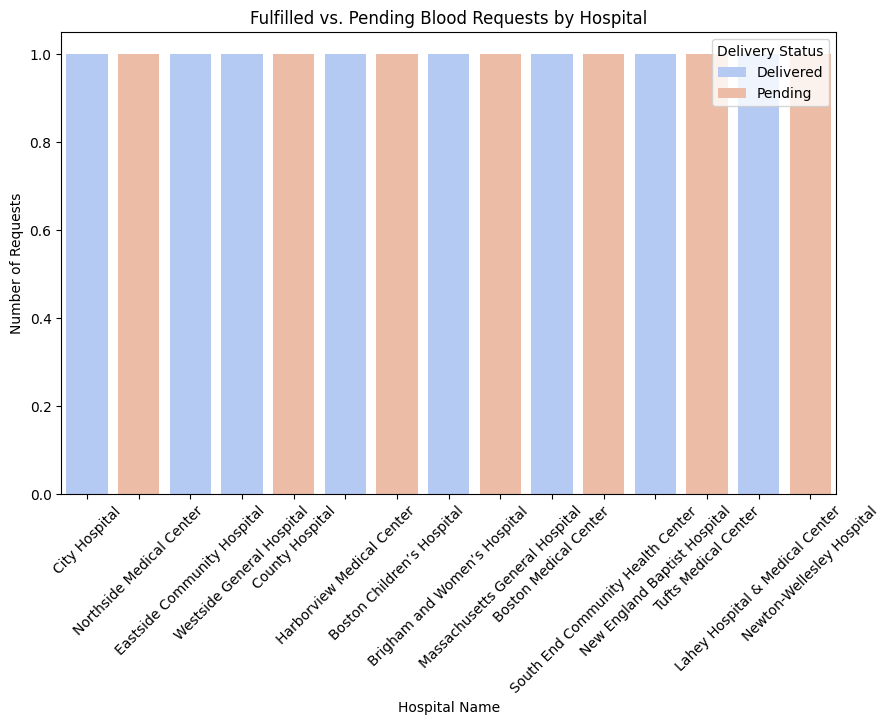

In [67]:
# Run SQL query to get fulfillment status for each hospital
query = '''
    SELECT h.Name AS Hospital_Name, bd.Status, COUNT(bd.Delivery_ID) AS Total_Deliveries
    FROM HOSPITAL h
    JOIN HOSPITAL_BLOOD_REQUESTS hbr ON h.Hospital_ID = hbr.Hospital_ID
    JOIN BLOOD_DELIVERY bd ON hbr.Request_ID = bd.Request_ID
    GROUP BY h.Name, bd.Status;
'''

delivery_status = pd.read_sql_query(query, conn)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=delivery_status, x='Hospital_Name', y='Total_Deliveries', hue='Status', palette='coolwarm')
plt.title('Fulfilled vs. Pending Blood Requests by Hospital')
plt.xlabel('Hospital Name')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.legend(title='Delivery Status')
plt.show()


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/3792154982.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blood_counts = pd.read_sql_query(query, conn)


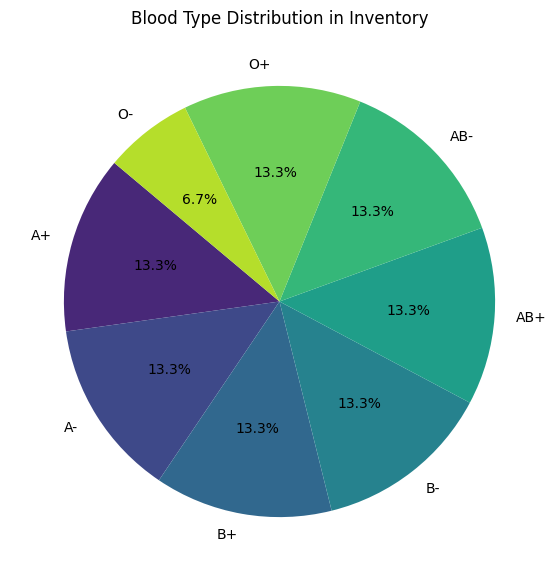

In [69]:
# SQL query to get the count of each blood type
query = '''
    SELECT Blood_Type, COUNT(*) AS Total
    FROM BLOOD
    WHERE Status = 'Available'
    GROUP BY Blood_Type;
'''

# Run the query and load data into a DataFrame
blood_counts = pd.read_sql_query(query, conn)

# Plotting
plt.figure(figsize=(7, 7))
plt.pie(blood_counts['Total'], labels=blood_counts['Blood_Type'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette("viridis", len(blood_counts)))
plt.title('Blood Type Distribution in Inventory')
plt.show()


In [120]:
import mysql.connector

# Connect to the MySQL database
conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",
    user="root",
    password="Bhavesh@2805",
    database="BloodDonationDB"
)

# Ensure the connection is valid
if conn.is_connected():
    print("Database connection established.")
else:
    print("Failed to connect to the database.")


Database connection established.


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_10703/1795902721.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  request_status = pd.read_sql_query(query, conn)


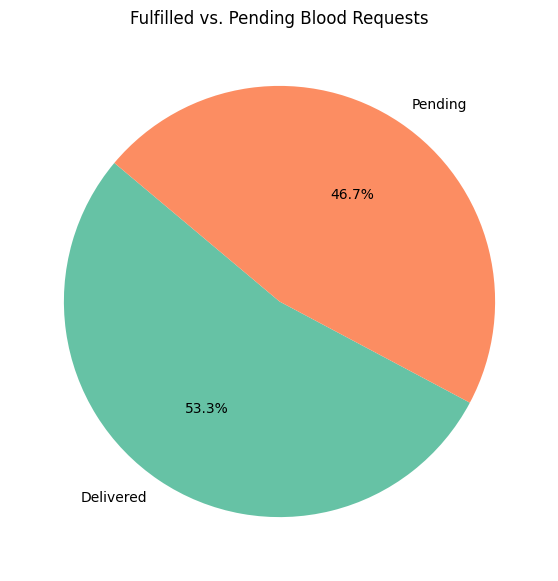

In [160]:
# SQL query to get the count of fulfilled and pending blood requests
query = '''
    SELECT bd.Status, COUNT(bd.Delivery_ID) AS Total_Requests
    FROM BLOOD_DELIVERY bd
    GROUP BY bd.Status;
'''

# Run the query and load data into a DataFrame
request_status = pd.read_sql_query(query, conn)

# Plotting
plt.figure(figsize=(7, 7))
plt.pie(request_status['Total_Requests'], labels=request_status['Status'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Fulfilled vs. Pending Blood Requests')
plt.show()


# TOTAL BLOOD TYPES IN INVENTORY

In [162]:
query = '''
    SELECT Blood_Type, COUNT(*) as Total
    FROM BLOOD
    WHERE Status = 'Available'
    GROUP BY Blood_Type;
'''

blood_inventory = pd.read_sql_query(query, conn)
print("\nBlood Types in Inventory:")
print(blood_inventory)



Blood Types in Inventory:
  Blood_Type  Total
0         A+      2
1         A-      2
2         B+      2
3         B-      2
4        AB+      2
5        AB-      2
6         O+      2
7         O-      1


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_10703/1333308872.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  blood_inventory = pd.read_sql_query(query, conn)


# DONORS AND THEIR BLOOD DONATIONS

In [164]:
query = '''
    SELECT d.Name, d.Contact_Info, dh.Donation_Date, b.Blood_Type
    FROM DONOR d
    JOIN DONATION_HISTORY dh ON d.Donor_ID = dh.Donor_ID
    JOIN BLOOD b ON dh.Blood_ID = b.Blood_ID;
'''

donor_donations = pd.read_sql_query(query, conn)
print("\nDonors and Their Blood Donations:")
print(donor_donations)



Donors and Their Blood Donations:
                  Name             Contact_Info Donation_Date Blood_Type
0             John Doe         john@example.com    2024-01-10         A+
1           Jane Smith         jane@example.com    2024-01-12         A-
2         Robert Brown       robert@example.com    2024-01-14         B+
3          Emily Davis        emily@example.com    2024-01-16         B-
4       Michael Wilson      michael@example.com    2024-01-18        AB+
5      Jessica Johnson      jessica@example.com    2024-01-20        AB-
6            David Lee        david@example.com    2024-01-22         O+
7       Sarah Martinez        sarah@example.com    2024-01-24         O-
8       William Garcia      william@example.com    2024-01-26         A+
9      Linda Rodriguez        linda@example.com    2024-01-28         A-
10    Daniel Hernandez       daniel@example.com    2024-01-30         B+
11          Laura King        laura@example.com    2024-02-01         B-
12  Christopher 

/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_10703/4183002660.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  donor_donations = pd.read_sql_query(query, conn)


/var/folders/zf/dtk1s5c56mx5hp7jcj92swhw0000gn/T/ipykernel_42573/3330954395.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_requested_blood = pd.read_sql_query(query, conn)


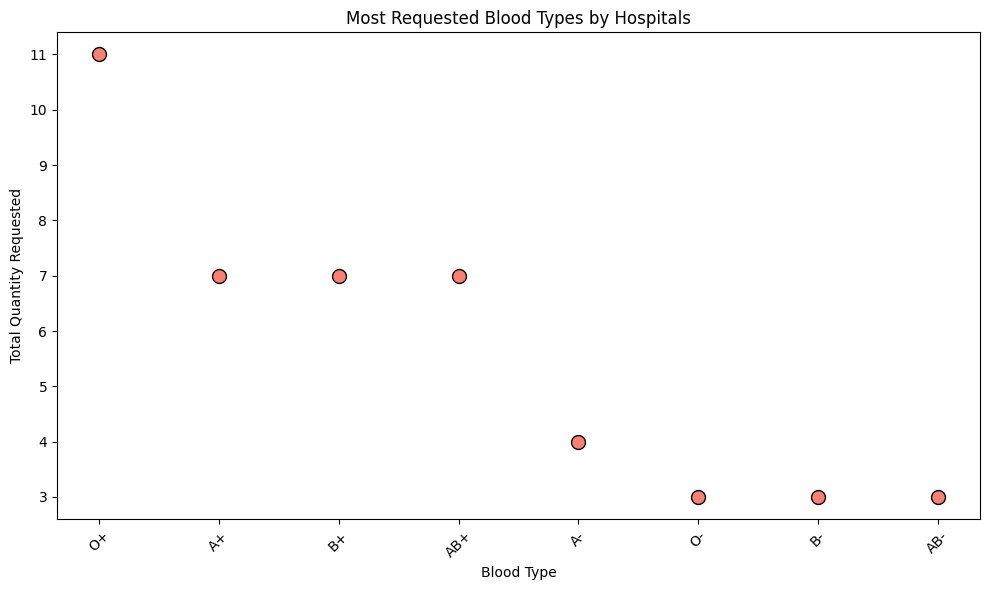

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Step 1: Establish a connection to the MySQL database
conn = mysql.connector.connect(
    host="Bhaveshs-MacBook-Air.local",  # MySQL server address
    user="root",                       # MySQL username
    password="Bhavesh@2805",           # MySQL password
    database="BloodDonationDB"         # Name of the database
)

# Step 2: Write the SQL query to fetch blood type and the total quantity requested
query = '''
    SELECT hbr.Blood_Type_Requested, SUM(hbr.Quantity_Requested) AS Total_Quantity_Requested
    FROM HOSPITAL_BLOOD_REQUESTS hbr
    GROUP BY hbr.Blood_Type_Requested
    ORDER BY Total_Quantity_Requested DESC;
'''

# Step 3: Execute the query and load the result into a pandas DataFrame
most_requested_blood = pd.read_sql_query(query, conn)

# Step 4: Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(most_requested_blood['Blood_Type_Requested'], most_requested_blood['Total_Quantity_Requested'], color='salmon', edgecolor='black', s=100)  # s is the marker size
plt.title('Most Requested Blood Types by Hospitals')
plt.xlabel('Blood Type')
plt.ylabel('Total Quantity Requested')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to avoid label clipping
plt.show()

# Step 5: Close the database connection
conn.close()
